In [0]:
import pandas as pd
import numpy as np

from itertools import chain
import matplotlib.pyplot as plt
import os
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [0]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,accuracy_score
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import GRU, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [0]:

!pip3 install hyperas

In [0]:
!pip3 install git+https://github.com/maxpumperla/hyperas.git

  Cloning https://github.com/maxpumperla/hyperas.git to /tmp/pip-req-build-m944svk6
  Running command git clone -q https://github.com/maxpumperla/hyperas.git /tmp/pip-req-build-m944svk6
  Created wheel for hyperas: filename=hyperas-0.4.1-cp36-none-any.whl size=9316 sha256=c0d16b09bbca803eaf68227dbe4b0c358fbbcbec6aa952d8d80be13bf63af922
  Stored in directory: /tmp/pip-ephem-wheel-cache-dhaeonvh/wheels/27/c7/75/b70097065b73570eda25350a796d87c41cd967471a04064cc2
Successfully built hyperas


In [0]:

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/EE599 Final Project/final dataset/testing_data.csv',encoding='utf-8')
print(data.shape)
data.shape[0] - data.dropna().shape[0]
print(data.shape[0])
data_copy = data.copy()

(2610, 196)
2610


In [0]:

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
data_copy

,Name,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,text,Label
0,dia0_utt0.mp3,-352.847230,121.015248,-14.527324,14.125641,-14.020860,5.341154,-12.629353,-5.395495,-13.576809,-11.516812,-7.851610,4.724108,-9.763668,1.475494,-4.801957,0.858676,-7.443775,-4.622409,-7.551417,-4.162367,-7.317542,-0.495181,-5.281505,-3.080994,-4.586307,-1.282533,-4.348640,0.207438,-0.878259,2.934153,-1.024561,1.715051,-0.408794,3.060293,1.812697,2.356631,-1.373783,0.377254,-2.002667,...,0.001643,0.000509,0.000767,0.000553,0.000200,0.000200,0.000213,0.000166,0.000162,0.000348,0.000193,0.000176,0.000175,0.000194,0.000128,0.000172,0.000077,0.000049,0.000048,0.000039,0.000027,0.000021,0.000017,0.000006,4.380000e-07,18.425841,15.062490,17.402848,15.631939,16.740558,17.206656,33.045751,-0.006822,-0.006087,0.043981,-0.039448,-0.000242,0.002305,Why do all youre coffee mugs have numbers on ...,2
1,dia0_utt1.mp3,-342.173040,87.203097,-32.661778,16.109090,-15.958594,-2.311523,-12.116084,-2.631662,-9.685679,4.839020,-12.786594,1.247238,-11.057635,0.565992,-2.867309,-3.594613,-4.907335,-3.785351,-5.986928,-3.690339,-4.032539,-1.886870,-5.303846,-1.372830,-2.040867,0.732936,-0.424088,4.070237,1.206451,6.098135,1.296045,4.654348,0.546106,0.204046,-4.659502,-0.740560,-2.165028,0.435965,-2.183636,...,0.000912,0.001100,0.001129,0.001538,0.001193,0.001180,0.001544,0.001823,0.001600,0.002235,0.001512,0.001008,0.000846,0.000963,0.000942,0.000863,0.000630,0.000494,0.000305,0.000244,0.000182,0.000149,0.000090,0.000030,2.030000e-06,14.224542,16.407779,18.892892,18.010093,18.348537,19.530672,34.869454,-0.003380,-0.001250,-0.000798,0.004915,0.002242,0.000521,Oh. Thats so Monica can keep track. That way ...,6
2,dia0_utt2.mp3,-362.927491,112.528435,-7.877308,22.242228,-11.401592,4.034038,-9.438521,2.434923,-5.027654,0.462079,-6.030224,1.669935,-8.438696,-1.618324,-8.217463,-4.668929,-7.900016,-3.886683,-5.209033,-7.147430,-11.590658,-3.313086,-8.007236,-4.034153,-9.712629,-3.721231,-3.984328,7.513057,2.369954,5.147645,-1.870706,-3.827336,-7.406459,0.140606,-2.623259,0.039479,-2.414285,-1.208602,-4.839823,...,0.000116,0.000067,0.000052,0.000061,0.000058,0.000047,0.000051,0.000042,0.000039,0.000070,0.000082,0.000073,0.000040,0.000023,0.000019,0.000021,0.000020,0.000017,0.000011,0.000010,0.000011,0.000014,0.000012,0.000004,2.830000e-07,17.731637,16.940625,16.401410,16.397150,16.150507,16.552198,32.318264,-0.019917,-0.009774,0.081948,-0.029796,-0.003427,-0.017818,Y'know what?,0
3,dia100_utt0.mp3,-298.204423,97.688888,-39.464460,23.281199,-19.077867,3.713634,-6.268458,0.173581,-13.445312,6.140498,-5.953345,3.728337,-9.579415,0.378333,-1.065117,3.235801,-3.761408,2.221472,-4.156855,-0.001728,1.160368,8.821804,1.834773,3.634073,-2.392280,-0.813175,-2.074975,2.231445,-3.572630,0.324511,-3.711270,-0.389861,-5.293983,-2.420927,-1.680547,1.735901,-3.268899,-0.049835,-2.266700,...,0.001636,0.002643,0.001021,0.002962,0.001407,0.001195,0.001986,0.001242,0.000968,0.000557,0.000492,0.000778,0.000584,0.001015,0.000681,0.000690,0.000711,0.000299,0.000118,0.000130,0.000066,0.000047,0.000020,0.000007,5.510000e-07,14.095936,16.836626,19.372216,17.899932,19.226419,19.873867,39.464127,0.004058,-0.006257,0.024170,0.003161,-0.013062,0.004476,"Me taking care of you is no problem, huh?",0
4,dia100_utt1.mp3,-357.434918,72.865840,-20.977707,22.088450,-13.571144,7.637375,-15.330419,12.083425,-3.779123,3.691567,-7.442588,9.010142,-5.671923,3.706214,2.372784,5.259303,1.078772,6.696903,0.847004,5.164449,-0.757694,0.033082,-4.803117,0.163649,-0.476879,3.575810,-1.274792,1.683424,-2.701994,-1.269879,-6.474667,-2.070633,-3.125841,-0.570343,-4.302230,0.518745,-1.368030,2.619352,-0.339916,...,0.001015,0.001265,0.001270,0.001029,0.001494,0.001311,0.001422,0.001488,0.000973,0.000990,0.000686,0.000694

In [0]:
tokenized_single_posts = [nltk.tokenize.word_tokenize(i) for i in data.text]
len(tokenized_single_posts)

2610

In [0]:
print(tokenized_single_posts[9])


['Why', 'are', 'there', 'only', 'two', 'of', 'you', '?']


In [0]:
leng = []
for i in range(len(tokenized_single_posts)):
    length = len(tokenized_single_posts[i])
    leng.append(length)

In [0]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:

import string
stp_removed = []
for i in range (len(tokenized_single_posts)):
    stp = [word for word in tokenized_single_posts[i] if word not in (stopwords.words('english')+list(string.punctuation))]
    stp_removed.append(stp)

In [0]:

print(len(stp_removed))
print(stp_removed[9])

2610
['Why', 'two']


In [0]:

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Remove all the plural and change all the verb into present tense 


In [0]:

words_lemma = []
lemma = nltk.WordNetLemmatizer()
for i in range(len(stp_removed)):
    words = [lemma.lemmatize(word) for word in stp_removed[i]]
    words_lemma.append(words)

In [0]:
print(len(words_lemma))
print(words_lemma[9])  

2610
['Why', 'two']


In [0]:

words_noNum = []
for i in range(len(words_lemma)):
    words = [word for word in words_lemma[i] if word.isdigit() == False]
    words_noNum.append(words)

In [0]:

print(words_noNum[9])

['Why', 'two']


In [0]:
words_nonSingle = []
for i in range(len(words_noNum)):
    words = [word for word in words_noNum[i] if len(word) > 1]
    words_nonSingle.append(words)

In [0]:
words_alpha = []
for i in range(len(words_nonSingle)):
    words = [word for word in words_nonSingle[i] if word.isalpha()]
    words_alpha.append(words)

In [0]:
print(words_alpha[9])

['Why', 'two']


In [0]:

data_copy['words_count'] = [len(i) for i in words_alpha]

In [0]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
noun_freq = []
verb_freq = []
adjective_freq = []
adverb_freq = []
for i in range(len(words_alpha)):
    word_pos_tag = nltk.pos_tag(words_alpha[i])
    count_noun = 0
    count_verb = 0
    count_adjective = 0
    count_adverb = 0
    for j in range(len(word_pos_tag)):
        if word_pos_tag[j][1] == "NN":
            count_noun += 1
        if word_pos_tag[j][1] == 'VB':
            count_verb += 1
        if word_pos_tag[j][1] == 'JJ':
            count_adjective += 1
        if word_pos_tag[j][1] == 'RB':
            count_adverb += 1
    noun_freq.append(count_noun/(len(words_alpha[i]) + 1))
    verb_freq.append(count_verb/(len(words_alpha[i])+1))
    adjective_freq.append(count_adjective/(len(words_alpha[i])+1))
    adverb_freq.append(count_adverb/(len(words_alpha[i])+1))

In [0]:
freq_dict = {'noun_freq' : noun_freq, 'verb_freq' : verb_freq, 'adjective_freq' : adjective_freq, 'adverb_freq' : adverb_freq}


In [0]:

data_copy = data_copy.join(pd.DataFrame(freq_dict))
data_copy.head()


,Name,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,text,Label,words_count,noun_freq,verb_freq,adjective_freq,adverb_freq
0,dia0_utt0.mp3,-352.847230,121.015248,-14.527324,14.125641,-14.020860,5.341154,-12.629353,-5.395495,-13.576809,-11.516812,-7.851610,4.724108,-9.763668,1.475494,-4.801957,0.858676,-7.443775,-4.622409,-7.551417,-4.162367,-7.317542,-0.495181,-5.281505,-3.080994,-4.586307,-1.282533,-4.348640,0.207438,-0.878259,2.934153,-1.024561,1.715051,-0.408794,3.060293,1.812697,2.356631,-1.373783,0.377254,-2.002667,...,0.000200,0.000213,0.000166,0.000162,0.000348,0.000193,0.000176,0.000175,0.000194,0.000128,0.000172,0.000077,0.000049,0.000048,0.000039,0.000027,0.000021,0.000017,0.000006,4.380000e-07,18.425841,15.062490,17.402848,15.631939,16.740558,17.206656,33.045751,-0.006822,-0.006087,0.043981,-0.039448,-0.000242,0.002305,Why do all youre coffee mugs have numbers on ...,2,5,0.666667,0.000000,0.0,0.0
1,dia0_utt1.mp3,-342.173040,87.203097,-32.661778,16.109090,-15.958594,-2.311523,-12.116084,-2.631662,-9.685679,4.839020,-12.786594,1.247238,-11.057635,0.565992,-2.867309,-3.594613,-4.907335,-3.785351,-5.986928,-3.690339,-4.032539,-1.886870,-5.303846,-1.372830,-2.040867,0.732936,-0.424088,4.070237,1.206451,6.098135,1.296045,4.654348,0.546106,0.204046,-4.659502,-0.740560,-2.165028,0.435965,-2.183636,...,0.001180,0.001544,0.001823,0.001600,0.002235,0.001512,0.001008,0.000846,0.000963,0.000942,0.000863,0.000630,0.000494,0.000305,0.000244,0.000182,0.000149,0.000090,0.000030,2.030000e-06,14.224542,16.407779,18.892892,18.010093,18.348537,19.530672,34.869454,-0.003380,-0.001250,-0.000798,0.004915,0.002242,0.000521,Oh. Thats so Monica can keep track. That way ...,6,10,0.272727,0.090909,0.0,0.0
2,dia0_utt2.mp3,-362.927491,112.528435,-7.877308,22.242228,-11.401592,4.034038,-9.438521,2.434923,-5.027654,0.462079,-6.030224,1.669935,-8.438696,-1.618324,-8.217463,-4.668929,-7.900016,-3.886683,-5.209033,-7.147430,-11.590658,-3.313086,-8.007236,-4.034153,-9.712629,-3.721231,-3.984328,7.513057,2.369954,5.147645,-1.870706,-3.827336,-7.406459,0.140606,-2.623259,0.039479,-2.414285,-1.208602,-4.839823,...,0.000047,0.000051,0.000042,0.000039,0.000070,0.000082,0.000073,0.000040,0.000023,0.000019,0.000021,0.000020,0.000017,0.000011,0.000010,0.000011,0.000014,0.000012,0.000004,2.830000e-07,17.731637,16.940625,16.401410,16.397150,16.150507,16.552198,32.318264,-0.019917,-0.009774,0.081948,-0.029796,-0.003427,-0.017818,Y'know what?,0,0,0.000000,0.000000,0.0,0.0
3,dia100_utt0.mp3,-298.204423,97.688888,-39.464460,23.281199,-19.077867,3.713634,-6.268458,0.173581,-13.445312,6.140498,-5.953345,3.728337,-9.579415,0.378333,-1.065117,3.235801,-3.761408,2.221472,-4.156855,-0.001728,1.160368,8.821804,1.834773,3.634073,-2.392280,-0.813175,-2.074975,2.231445,-3.572630,0.324511,-3.711270,-0.389861,-5.293983,-2.420927,-1.680547,1.735901,-3.268899,-0.049835,-2.266700,...,0.001195,0.001986,0.001242,0.000968,0.000557,0.000492,0.000778,0.000584,0.001015,0.000681,0.000690,0.000711,0.000299,0.000118,0.000130,0.000066,0.000047,0.000020,0.000007,5.510000e-07,14.095936,16.836626,19.372216,17.899932,19.226419,19.873867,39.464127,0.004058,-0.006257,0.024170,0.003161,-0.013062,0.004476,"Me taking care of you is no problem, huh?",0,5,0.500000,0.000000,0.0,0.0
4,dia100_utt1.mp3,-357.434918,72.865840,-20.977707,22.088450,-13.571144,7.637375,-15.330419,12.083425,-3.779123,3.691567,-7.442588,9.010142,-5.671923,3.706214,2.372784,5.259303,1.078772,6.696903,0.847004,5.164449,-0.757694,0.033082,-4.803117,0.163649,-0.476879,3.575810,-1.274792,1.683424,-2.701994,-1.269879,-6.474667,-2.070633,-3.125841,-0.570343,-4.302230,0.518745,-1.368030,2.619352,-0.339916,...,0.001311,0.001422,0.001488,0.000973,0.000990,0.000686,0.000694,0.000598,0.000683,0.000522,0.000316,0.000267,0.000162,0.000137,0.000081,

In [0]:
last_col = data_copy.pop(data_copy.columns[195])
data_copy.insert(1, last_col.name, last_col)

In [0]:
data_copy

,Name,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,text,words_count,noun_freq,verb_freq,adjective_freq,Label,adverb_freq
0,dia0_utt0.mp3,-352.847230,121.015248,-14.527324,14.125641,-14.020860,5.341154,-12.629353,-5.395495,-13.576809,-11.516812,-7.851610,4.724108,-9.763668,1.475494,-4.801957,0.858676,-7.443775,-4.622409,-7.551417,-4.162367,-7.317542,-0.495181,-5.281505,-3.080994,-4.586307,-1.282533,-4.348640,0.207438,-0.878259,2.934153,-1.024561,1.715051,-0.408794,3.060293,1.812697,2.356631,-1.373783,0.377254,-2.002667,...,0.000200,0.000213,0.000166,0.000162,0.000348,0.000193,0.000176,0.000175,0.000194,0.000128,0.000172,0.000077,0.000049,0.000048,0.000039,0.000027,0.000021,0.000017,0.000006,4.380000e-07,18.425841,15.062490,17.402848,15.631939,16.740558,17.206656,33.045751,-0.006822,-0.006087,0.043981,-0.039448,-0.000242,0.002305,Why do all youre coffee mugs have numbers on ...,5,0.666667,0.000000,0.000000,2,0.0
1,dia0_utt1.mp3,-342.173040,87.203097,-32.661778,16.109090,-15.958594,-2.311523,-12.116084,-2.631662,-9.685679,4.839020,-12.786594,1.247238,-11.057635,0.565992,-2.867309,-3.594613,-4.907335,-3.785351,-5.986928,-3.690339,-4.032539,-1.886870,-5.303846,-1.372830,-2.040867,0.732936,-0.424088,4.070237,1.206451,6.098135,1.296045,4.654348,0.546106,0.204046,-4.659502,-0.740560,-2.165028,0.435965,-2.183636,...,0.001180,0.001544,0.001823,0.001600,0.002235,0.001512,0.001008,0.000846,0.000963,0.000942,0.000863,0.000630,0.000494,0.000305,0.000244,0.000182,0.000149,0.000090,0.000030,2.030000e-06,14.224542,16.407779,18.892892,18.010093,18.348537,19.530672,34.869454,-0.003380,-0.001250,-0.000798,0.004915,0.002242,0.000521,Oh. Thats so Monica can keep track. That way ...,10,0.272727,0.090909,0.000000,6,0.0
2,dia0_utt2.mp3,-362.927491,112.528435,-7.877308,22.242228,-11.401592,4.034038,-9.438521,2.434923,-5.027654,0.462079,-6.030224,1.669935,-8.438696,-1.618324,-8.217463,-4.668929,-7.900016,-3.886683,-5.209033,-7.147430,-11.590658,-3.313086,-8.007236,-4.034153,-9.712629,-3.721231,-3.984328,7.513057,2.369954,5.147645,-1.870706,-3.827336,-7.406459,0.140606,-2.623259,0.039479,-2.414285,-1.208602,-4.839823,...,0.000047,0.000051,0.000042,0.000039,0.000070,0.000082,0.000073,0.000040,0.000023,0.000019,0.000021,0.000020,0.000017,0.000011,0.000010,0.000011,0.000014,0.000012,0.000004,2.830000e-07,17.731637,16.940625,16.401410,16.397150,16.150507,16.552198,32.318264,-0.019917,-0.009774,0.081948,-0.029796,-0.003427,-0.017818,Y'know what?,0,0.000000,0.000000,0.000000,0,0.0
3,dia100_utt0.mp3,-298.204423,97.688888,-39.464460,23.281199,-19.077867,3.713634,-6.268458,0.173581,-13.445312,6.140498,-5.953345,3.728337,-9.579415,0.378333,-1.065117,3.235801,-3.761408,2.221472,-4.156855,-0.001728,1.160368,8.821804,1.834773,3.634073,-2.392280,-0.813175,-2.074975,2.231445,-3.572630,0.324511,-3.711270,-0.389861,-5.293983,-2.420927,-1.680547,1.735901,-3.268899,-0.049835,-2.266700,...,0.001195,0.001986,0.001242,0.000968,0.000557,0.000492,0.000778,0.000584,0.001015,0.000681,0.000690,0.000711,0.000299,0.000118,0.000130,0.000066,0.000047,0.000020,0.000007,5.510000e-07,14.095936,16.836626,19.372216,17.899932,19.226419,19.873867,39.464127,0.004058,-0.006257,0.024170,0.003161,-0.013062,0.004476,"Me taking care of you is no problem, huh?",5,0.500000,0.000000,0.000000,0,0.0
4,dia100_utt1.mp3,-357.434918,72.865840,-20.977707,22.088450,-13.571144,7.637375,-15.330419,12.083425,-3.779123,3.691567,-7.442588,9.010142,-5.671923,3.706214,2.372784,5.259303,1.078772,6.696903,0.847004,5.164449,-0.757694,0.033082,-4.803117,0.163649,-0.476879,3.575810,-1.274792,1.683424,-2.701994,-1.269879,-6.474667,-2.070633,-3.125841,-0.570343,-4.302230,0.518745,-1.368030,2.619352,-0.339916,...,0.001311,0.001422,0.001488,0.000973,0.000990,0.000686,0.000694,0.000598,0.000683,0.000522,0.000316,0.000267,0.00016

In [0]:
data_copy =data_copy[['Name',	'Label','text','words_count'	,'noun_freq',	'verb_freq','adjective_freq','adverb_freq']]

In [0]:
features_distrbn = data_copy.groupby(['Label'], as_index = False)['words_count', 'adjective_freq', 'noun_freq', 'adverb_freq', 'verb_freq'].mean()
np.round(features_distrbn, 3)
data_copy.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Name,Label,text,words_count,noun_freq,verb_freq,adjective_freq,adverb_freq
0,dia0_utt0.mp3,2,Why do all youre coffee mugs have numbers on ...,5,0.666667,0.000000,0.0,0.0
1,dia0_utt1.mp3,6,Oh. Thats so Monica can keep track. That way ...,10,0.272727,0.090909,0.0,0.0
2,dia0_utt2.mp3,0,Y'know what?,0,0.000000,0.000000,0.0,0.0
3,dia100_utt0.mp3,0,"Me taking care of you is no problem, huh?",5,0.500000,0.000000,0.0,0.0
4,dia100_utt1.mp3,0,You guys feel safe.,4,0.000000,0.200000,0.2,0.0


In [0]:

MAX_SEQUENCE_LENGTH = 30
MAX_NUM_WORDS = 10000
EMBEDDING_DIM = 100

embeddings_index = {}

with open("/content/gdrive/My Drive/Colab Notebooks/EE599 Final Project/final dataset/glove.6B.100d.txt", encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
X = data_copy.iloc[:,2:8]
y = data_copy['Label']
print(len(X),len(y))


2610 2610


In [0]:
data_copy.to_csv("test_data_text_7.csv")

In [0]:
x_train_val, x_test, y_train_val, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, 
                                    y_train_val, test_size = 0.2, random_state =  0)

In [0]:
train_full = pd.concat([x_train, y_train], axis = 1)
train_full.head()

,Text,words_count,noun_freq,verb_freq,adjective_freq,adverb_freq,Label
904,"Oh no, stay here well keep doing this. Ill p...",4,0.200000,0.000000,0.400000,0.00,1
3053,"Well, umm, my Moms friend, Phoebe, is actuall...",7,0.250000,0.000000,0.125000,0.25,2
6695,"And I thought I would bring them to you, ykno...",5,0.333333,0.166667,0.000000,0.00,2
5142,"Alright people, now everyone grab a partner.",5,0.500000,0.000000,0.166667,0.00,2
1369,"Look, I don't have to answer your questions! O...",8,0.222222,0.000000,0.111111,0.00,2


In [0]:
word_count_distrbn_train = train_full.groupby(['Label'], 
        as_index = False)['words_count', 'adjective_freq', 'noun_freq', 'adverb_freq', 'verb_freq'].mean()
np.round(word_count_distrbn_train, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Label,words_count,adjective_freq,noun_freq,adverb_freq,verb_freq
0,0,4.200,0.068,0.228,0.054,0.050
1,1,4.298,0.065,0.218,0.058,0.046
2,2,4.070,0.064,0.209,0.061,0.049


In [0]:
print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)
print(set(y_train))

(5592, 6) (1399, 6) (2997, 6)
(5592,) (1399,) (2997,)
{0, 1, 2}


In [0]:
tokenizer = Tokenizer()   # get the frequently occuring words
tokenizer.fit_on_texts(x_train.Text)           
train_sequences = tokenizer.texts_to_sequences(x_train.Text)
val_sequences = tokenizer.texts_to_sequences(x_val.Text)
test_sequences = tokenizer.texts_to_sequences(x_test.Text)

word_index = tokenizer.word_index               # dictionary containing words and their index
print(tokenizer.word_index)                   # print to check
print('Found %s unique tokens.' % len(word_index)) # total words in the corpus
train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
val_data = pad_sequences(val_sequences, maxlen = MAX_SEQUENCE_LENGTH)# get only the top frequent words on train
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)   # get only the top frequent words on test

print(train_data[0])
print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

{'i': 1, 'you': 2, 'the': 3, 'to': 4, 'a': 5, 'and': 6, 'oh': 7, 'it': 8, 'that': 9, 'no': 10, 'what': 11, 'me': 12, 'is': 13, 'this': 14, 'so': 15, 'okay': 16, 'in': 17, 'of': 18, 'my': 19, 'yeah': 20, 'just': 21, 'we': 22, 'have': 23, 'do': 24, 'hey': 25, 'well': 26, 'i\x92m': 27, 'on': 28, 'all': 29, 'know': 30, 'right': 31, 'are': 32, 'with': 33, 'was': 34, 'not': 35, 'for': 36, 'be': 37, 'but': 38, 'like': 39, 'it\x92s': 40, 'here': 41, 'go': 42, 'your': 43, 'gonna': 44, 'get': 45, 'don\x92t': 46, 'really': 47, 'he': 48, 'uh': 49, 'out': 50, 'about': 51, 'look': 52, "i'm": 53, 'can': 54, 'her': 55, 'think': 56, 'up': 57, 'if': 58, 'now': 59, 'at': 60, 'one': 61, 'that\x92s': 62, 'see': 63, 'there': 64, 'how': 65, 'got': 66, 'mean': 67, 'come': 68, 'why': 69, 'god': 70, 'you\x92re': 71, 'ross': 72, 'him': 73, 'sorry': 74, "it's": 75, 'did': 76, 'want': 77, 'they': 78, 'tell': 79, 'good': 80, 'joey': 81, 'she': 82, 'guys': 83, 'when': 84, 'great': 85, 'y\x92know': 86, 'would': 87, "

In [0]:

scaleable_cols = ['words_count', 'adjective_freq', 'noun_freq', 'adverb_freq', 'verb_freq']

In [0]:
scaler_multicol = MinMaxScaler()
train_multicol_scaled = scaler_multicol.fit_transform(x_train[scaleable_cols])
val_multicol_scaled = scaler_multicol.fit_transform(x_val[scaleable_cols])
test_multicol_scaled = scaler_multicol.fit_transform(x_test[scaleable_cols])

In [0]:
train_multicol_scaled[2]

array([0.14705882, 0.        , 0.41666667, 0.        , 0.22222222])

In [0]:
train_data = np.hstack((train_data, train_multicol_scaled))
val_data = np.hstack((val_data, val_multicol_scaled))
test_data = np.hstack((test_data, test_multicol_scaled))

print(train_data.shape)
print(val_data.shape)
print(test_data.shape)


(5592, 35)
(1399, 35)
(2997, 35)


In [0]:
print(train_data[0])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.00000000e+00
 1.00000000e+01 2.54000000e+02 4.10000000e+01 2.51000000e+02
 3.31000000e+02 1.40000000e+02 1.40000000e+01 1.49000000e+02
 4.77000000e+02 2.00000000e+00 1.17647059e-01 5.33333333e-01
 2.50000000e-01 0.00000000e+00 0.00000000e+00]


In [0]:
num_words = min(MAX_NUM_WORDS, len(embeddings_index))
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [0]:
posts_input = Input(shape=(None,), dtype='int32', name='all_posts')
embedded_posts = Embedding(input_dim=MAX_NUM_WORDS,
                            input_length=MAX_SEQUENCE_LENGTH, 
                            output_dim=EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            trainable=False)(posts_input)

x = layers.GRU(256, activation='relu', return_sequences = True)(embedded_posts)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x = layers.GRU(64, activation = 'relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.2)(x)
label_pred = layers.Dense(3, activation = 'softmax', name = 'label1')(x)


combined_model = Model(posts_input, [label_pred])
combined_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
all_posts (InputLayer)       [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 100)         1000000   
_________________________________________________________________
gru (GRU)                    (None, None, 256)         274944    
_________________________________________________________________
batch_normalization (BatchNo (None, None, 256)         1024      
_________________________________________________________________
dropout (Dropout)            (None, None, 256)         0         
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                61824     
_________________________________________________________________
dense (Dense)                (None, 32)                2080  

In [0]:

callbacks_list = [
                ModelCheckpoint(filepath='model_multi-feature.h5', monitor='val_loss',
                        save_best_only=True,)]

In [0]:
combined_model.compile(optimizer = 'rmsprop',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [0]:
epochs = 50
batch_size = 32

In [0]:
hist = combined_model.fit(train_data,  y_train,
                                  epochs = epochs, batch_size = batch_size,
                   callbacks = callbacks_list,
               validation_data = (val_data,  y_val)).history

Epoch 1/50
175/175 [==============================] - 23s 129ms/step - loss: 1.0725 - accuracy: 0.4565 - val_loss: 1.0786 - val_accuracy: 0.4753
Epoch 2/50
175/175 [==============================] - 22s 127ms/step - loss: 1.0616 - accuracy: 0.4666 - val_loss: 1.0616 - val_accuracy: 0.4761
Epoch 3/50
175/175 [==============================] - 22s 126ms/step - loss: 1.0558 - accuracy: 0.4658 - val_loss: 1.0601 - val_accuracy: 0.4746
Epoch 4/50
175/175 [==============================] - 22s 126ms/step - loss: 1.0365 - accuracy: 0.4766 - val_loss: 1.0863 - val_accuracy: 0.4553
Epoch 5/50
175/175 [==============================] - 22s 126ms/step - loss: 1.0117 - accuracy: 0.4916 - val_loss: 1.0859 - val_accuracy: 0.4596
Epoch 6/50
175/175 [==============================] - 22s 128ms/step - loss: 0.9710 - accuracy: 0.5150 - val_loss: 1.1623 - val_accuracy: 0.4610
Epoch 7/50
175/175 [==============================] - 22s 128ms/step - loss: 0.9334 - accuracy: 0.5427 - val_loss: 1.2475 - val_ac

In [0]:
import h5py
train_acc = hist['accuracy']
val_acc = hist['val_accuracy']


with h5py.File('learningrate_plot.hd5', 'w') as hf:
    hf.create_dataset('train_acc', data = train_acc)
    hf.create_dataset('val_acc', data = val_acc)


In [0]:
model1 = load_model('model_multi-feature.h5')

In [0]:
pred = model1.predict(test_data)
print(pred)

[[0.2553948  0.2992152  0.44539005]
 [0.26643708 0.31002623 0.42353672]
 [0.24986184 0.2686191  0.4815191 ]
 ...
 [0.26112318 0.3091177  0.42975911]
 [0.28301346 0.32008913 0.39689744]
 [0.27733737 0.32046217 0.4022005 ]]


In [0]:

label_predict = np.argmax(pred,axis=1 )
print(set(label_predict))

label_acc = accuracy_score(label_predict, y_test)

{1, 2}


In [0]:

print("ACCURACY : ",label_acc)



ACCURACY :  0.47414080747414084


train_acc
val_acc


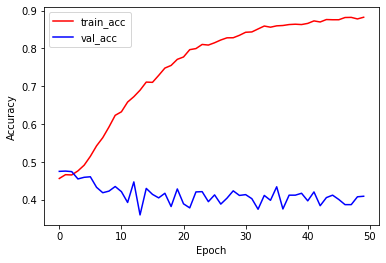

In [0]:
with h5py.File('learningrate_plot.hd5', 'r') as hf:
    for i in hf.keys():
        print(i)
    
    train_acc = hf['train_acc'][:] 
    val_acc = hf['val_acc'][:] 



epochs = 50

plt.figure()
plt.plot(np.arange(epochs),train_acc,'r',label = "train_acc")
plt.plot(np.arange(epochs),val_acc,'b',label = "val_acc")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


